In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('all_season_details.csv')

C:\Users\harik\AppData\Local\Temp\ipykernel_14804\776536892.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('all_season_details.csv')


In [5]:
df = pd.read_csv('all_season_details.csv', low_memory=False)

In [7]:
df.head()

,comment_id,season,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,110,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"nice and full, angling and perhaps swinging in...",<p><strong>7.30pm</strong> Gaikwad and Conway ...,NaN
1,120,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"Conway shuffles across off, and shimmies out a...",NaN,NaN
2,130,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"good length, angling in at off and then straig...",NaN,NaN
3,140,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shorter and slanting into middle and leg, Gaik...","<p>Rummy: ""Fast bowling options for CSK defini...",NaN
4,150,2023.0,1359475,GT v CSK,GT,CSK,CSK,1,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,False,Shami hits a heavy length and brings this back...,"<p>LG: ""Watching out for Hangargekar. He was i...",NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242550 entries, 0 to 242549
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   comment_id         242550 non-null  int64  
 1   season             242067 non-null  float64
 2   match_id           242550 non-null  int64  
 3   match_name         242550 non-null  object 
 4   home_team          242550 non-null  object 
 5   away_team          242550 non-null  object 
 6   current_innings    242550 non-null  object 
 7   innings_id         242550 non-null  int64  
 8   over               242550 non-null  int64  
 9   ball               242550 non-null  int64  
 10  runs               242550 non-null  int64  
 11  shortText          242550 non-null  object 
 12  isBoundary         242550 non-null  bool   
 13  isWide             242550 non-null  bool   
 14  isNoball           242550 non-null  bool   
 15  batsman1_id        242550 non-null  int64  
 16  ba

In [11]:
df.isnull().sum()  #checking for missing values

comment_id                0
season                  483
match_id                  0
match_name                0
home_team                 0
away_team                 0
current_innings           0
innings_id                0
over                      0
ball                      0
runs                      0
shortText                 0
isBoundary                0
isWide                    0
isNoball                  0
batsman1_id               0
batsman1_name             0
batsman1_runs             0
batsman1_balls            0
bowler1_id                0
bowler1_name              0
bowler1_overs             0
bowler1_maidens           0
bowler1_runs              0
bowler1_wkts              0
batsman2_id               0
batsman2_name             2
batsman2_runs             0
batsman2_balls            0
bowler2_id            12841
bowler2_name          12841
bowler2_overs         12841
bowler2_maidens       12841
bowler2_runs          12841
bowler2_wkts          12841
wicket_id           

In [23]:
print(df.columns)

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')


1. AVERAGE RUN RATE PER OVER

Task:Calculate the average run rate for each over across all matches.

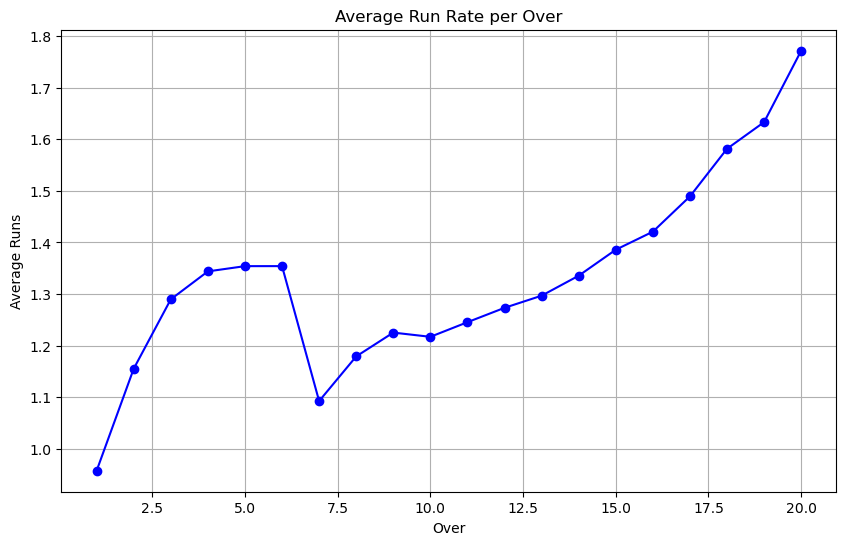

In [27]:
average_runs_per_over = df.groupby('over')['runs'].mean()
plt.figure(figsize=(10, 6))
average_runs_per_over.plot(kind='line', marker='o', color='b')
plt.title("Average Run Rate per Over")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.grid(True)
plt.show()

2. WICKET FALL DISTRIBUTION BY OVER

Task:Analyze which overs tend to see the most wickets fall.
The chart can reveal patterns, like whether more wickets fall in the middle overs or the "death" overs. This information can help teams decide which bowlers to use in these high-wicket overs to maximize their chances of taking wickets.

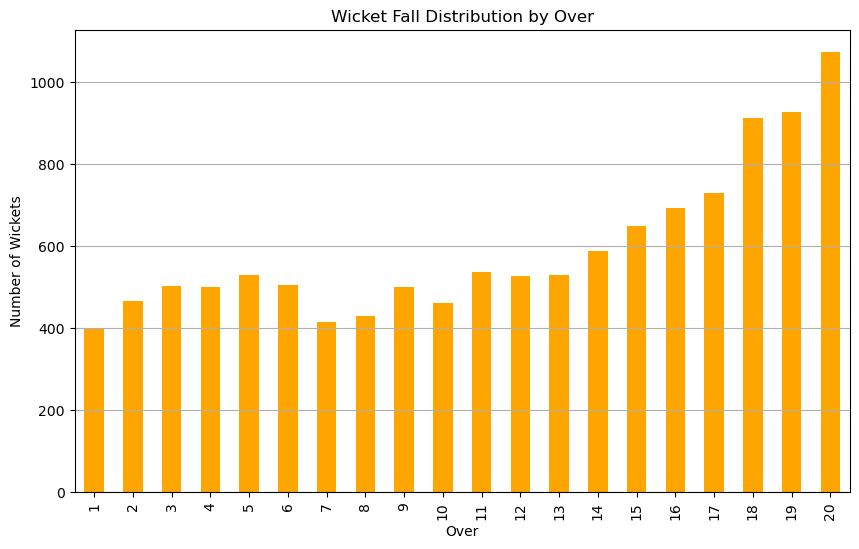

In [45]:
wickets_data = df[df['wicket_id'].notna()] #IDENTIFY WICKETS
wickets_per_over = wickets_data.groupby('over').size() #COUNTS WICKETS BY OVER
plt.figure(figsize=(10, 6))
wickets_per_over.plot(kind='bar', color='orange')
plt.title("Wicket Fall Distribution by Over")
plt.xlabel("Over")
plt.ylabel("Number of Wickets")
plt.grid(axis='y')
plt.show()

 3.TOP 10 PARTNERSHIPS BY TOTAL RUNS

Task:Identify the top 10 batting partnerships that have scored the most runs together.
This visualization reveals the most successful batting partnerships, which can help in understanding which player combinations have the best Energy

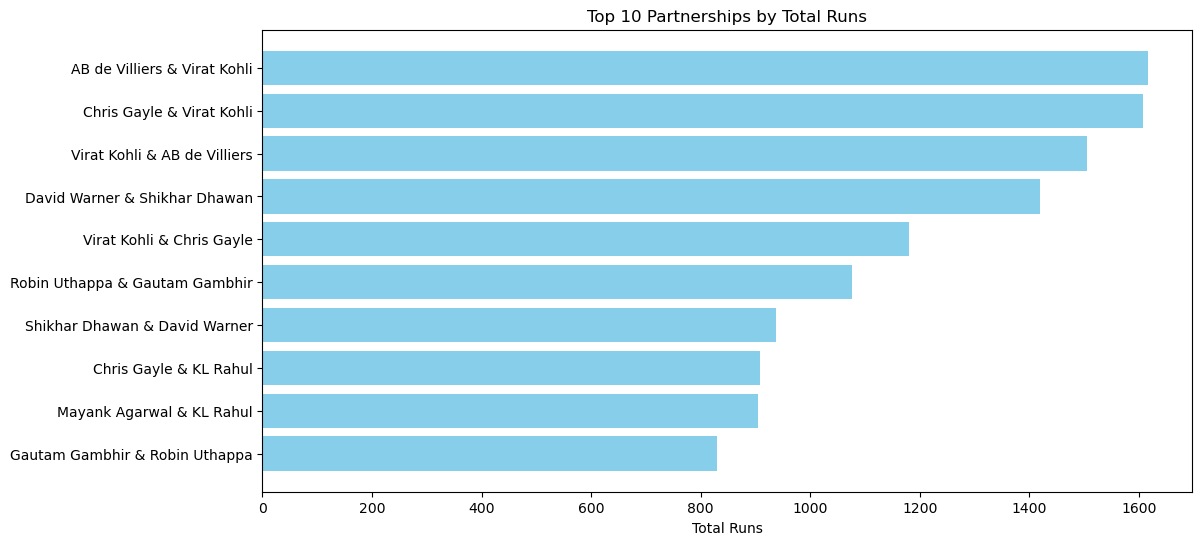

In [50]:
partnerships = df.groupby(['batsman1_name', 'batsman2_name'])['runs'].sum().reset_index()
#Sort and get the top 10 partnerships by total runs
top_10_partnerships = partnerships.nlargest(10, 'runs')
# Combine batsman names for display
top_10_partnerships['partnership'] = top_10_partnerships['batsman1_name'] + " & " + top_10_partnerships['batsman2_name']
plt.figure(figsize=(12, 6))
plt.barh(top_10_partnerships['partnership'], top_10_partnerships['runs'], color='skyblue')
plt.xlabel("Total Runs")
plt.title("Top 10 Partnerships by Total Runs")
plt.gca().invert_yaxis()
plt.show()

4. BATSMAN VS BOWLER ANALYSIS

Task: Analyze which batsmen have scored the most runs against specific bowlers.

This visualization highlights which batsmen have scored the most runs against specific bowlers.

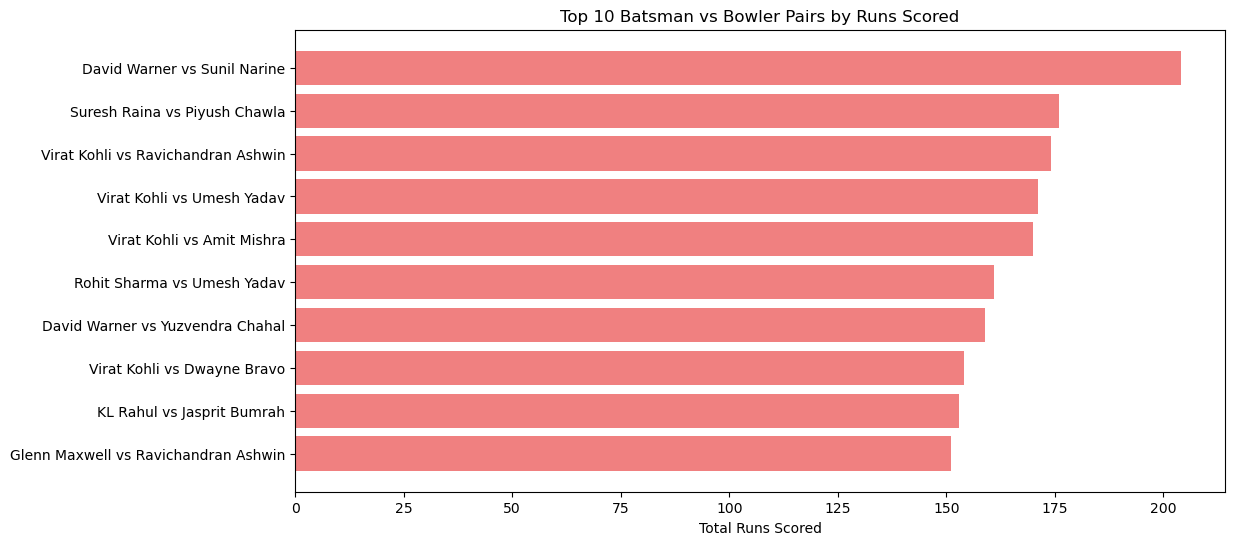

In [77]:
batsman_bowler_runs = df.groupby(['batsman1_name', 'bowler1_name'])['runs'].sum().reset_index()
# Get the top 10 batsman-bowler pairs by total runs scored
top_10_batsman_bowler_pairs = batsman_bowler_runs.nlargest(10, 'runs')
# Combine batsman and bowler names for display
top_10_batsman_bowler_pairs['pair'] = top_10_batsman_bowler_pairs['batsman1_name'] + " vs " + top_10_batsman_bowler_pairs['bowler1_name']
plt.figure(figsize=(12, 6))
plt.barh(top_10_batsman_bowler_pairs['pair'], top_10_batsman_bowler_pairs['runs'], color='lightcoral')
plt.xlabel("Total Runs Scored")
plt.title("Top 10 Batsman vs Bowler Pairs by Runs Scored")
plt.gca().invert_yaxis()
plt.show()

5.WICKETS BY DISMISSAL KIND PER BOWLER

Task: Analyze how different bowlers take wickets (e.g., caught, bowled, LBW).

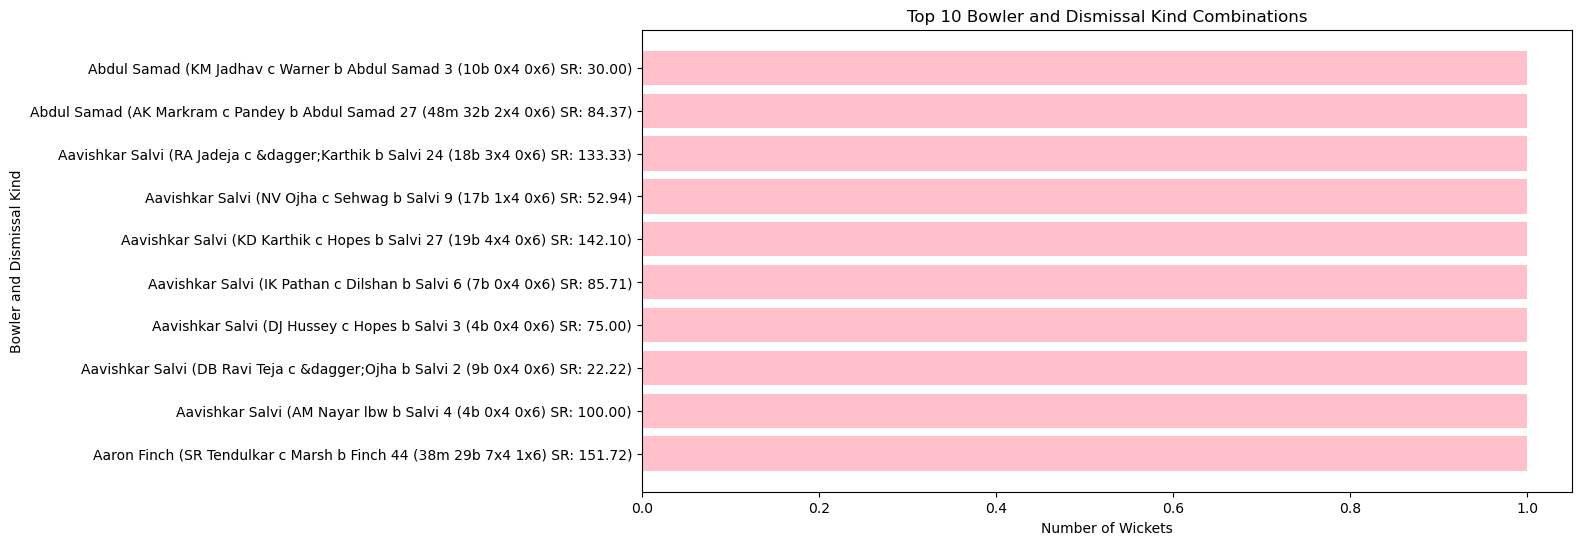

In [79]:
wickets_df = df[df['wicket_id'].notna()]
# Group by bowler and dismissal kind, then count the number of occurrences
dismissal_counts = wickets_df.groupby(['bowler1_name', 'wkt_text']).size().reset_index(name='wicket_count')
# Select the top 10 combinations based on wicket count
top_dismissals = dismissal_counts.nlargest(10, 'wicket_count')
plt.figure(figsize=(12, 6))
plt.barh(top_dismissals.apply(lambda x: f"{x['bowler1_name']} ({x['wkt_text']})", axis=1), top_dismissals['wicket_count'], color='PINK')
plt.xlabel("Number of Wickets")
plt.ylabel("Bowler and Dismissal Kind")
plt.title("Top 10 Bowler and Dismissal Kind Combinations")
plt.show()

 NOTE:The other abbreviations stand for "c" - caught "b" - bowled "SR" - strike rate "lbw" - leg before wicket